In [113]:
# Import required Library

In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### here we are going column name because data are not in proper way or not clean so first we give the column name to the data and then seprate the data after the name of \t.

In [115]:
columns_name = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('udata.csv',sep='\t',names = columns_name)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [116]:
movie_titels = pd.read_csv('Movie_Id_Titles.csv')
movie_titels.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### here we have movie titles name as well as we have item id that is simmilar to item id in udata.csv sowe are going to merge item_id and title to our main data frame

In [117]:
df = pd.merge(df,movie_titels, on = 'item_id')

In [118]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [119]:
lst = [df['rating'].unique()]
lst

[array([5, 4, 2, 3, 1])]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [121]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [122]:
df['title'].count()

100003

### Data Visualization

In [123]:
sns.set_style('white')

In [124]:
rating = df.groupby('title')['rating'].mean()
rating

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [125]:
# now from this data we can find out which movie is on high rating that we can check via this 
rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(30)
rating

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [126]:
rating = df.groupby('title')['rating'].count().sort_values(ascending=False).head(30)
rating

title
Star Wars (1977)                                584
Contact (1997)                                  509
Fargo (1996)                                    508
Return of the Jedi (1983)                       507
Liar Liar (1997)                                485
English Patient, The (1996)                     481
Scream (1996)                                   478
Toy Story (1995)                                452
Air Force One (1997)                            431
Independence Day (ID4) (1996)                   429
Raiders of the Lost Ark (1981)                  420
Godfather, The (1972)                           413
Pulp Fiction (1994)                             394
Twelve Monkeys (1995)                           392
Silence of the Lambs, The (1991)                390
Jerry Maguire (1996)                            384
Chasing Amy (1997)                              379
Rock, The (1996)                                378
Empire Strikes Back, The (1980)                 368
Star T

In [127]:
ratin_g = pd.DataFrame(df.groupby('title')['rating'].mean())
ratin_g

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


### here in data set many movies have only 3 or 4 persons rating and on the basis of 3 - 4 rating movies are on top so we are going to count number of rating on every movie

In [128]:
ratin_g['number_of_rating'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [129]:
ratin_g

,rating,number_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


<AxesSubplot:>

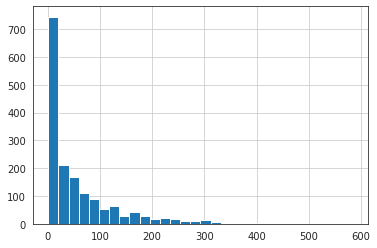

In [130]:
# plot histogram
ratin_g['number_of_rating'].hist(bins=30)

<AxesSubplot:>

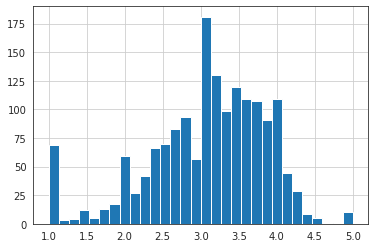

In [131]:
ratin_g['rating'].hist(bins=30)

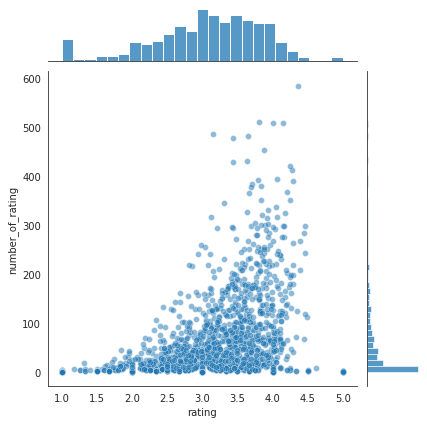

In [132]:
sns.jointplot(x='rating',y='number_of_rating',data=ratin_g,alpha=0.5)
# here in this we can say the more number of ratinngs increase the more number of  

In [133]:
# Pivot table 
# use of pivot table -> Pivot table is for get the data into matrix form.
movie_matrics = df.pivot_table(index='user_id', columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# checking most rating movies
ratin_g.sort_values('number_of_rating',ascending=False).head(20)

,rating,number_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [135]:
# so here we are going to choose 2 movies from this ratin_g data for there rating
starwars_ratng = movie_matrics['Star Wars (1977)']
liarliar_ratng = movie_matrics['Liar Liar (1997)']

In [136]:
starwars_ratng.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [137]:
liarliar_ratng.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [138]:
# correlation between series 
similar_to_starwars = movie_matrics.corrwith(starwars_ratng)

/home/nikhil/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/nikhil/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [139]:
similar_to_liarliar = movie_matrics.corrwith(liarliar_ratng)

In [140]:
corr_startwars = pd.DataFrame(similar_to_starwars,columns=['correlation'])
corr_startwars.dropna(inplace=True)
corr_startwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [141]:
# so here we are getting the positive correlation between movies and starwars
corr_startwars.sort_values('correlation',ascending=False).head(30)

,correlation
title,
Hollow Reed (1996),1.000000
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Star Wars (1977),1.000000
Man of the Year (1995),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [144]:
corr_startwars = corr_startwars.join(ratin_g['number_of_rating'])
corr_startwars.head()

,correlation,number_of_rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [148]:
corr_startwars[corr_startwars['number_of_rating']>100].sort_values('correlation',ascending=False).head()

,correlation,number_of_rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
